In [ ]:
#Libraries for data cleaning, preprocessing and analysis
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import StandardScaler

# Libraries for data visulisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotnine import *
import plotly.graph_objects as go
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import folium
from shapely.geometry import Point
from shapely import wkt
#Libraries of debugging
import warnings


warnings.filterwarnings('ignore')
sns.set(color_codes = True)   
sns.set_palette(palette = 'magma', n_colors = 8)

warnings.filterwarnings('ignore')
sns.set(color_codes = True)   
sns.set_palette(palette = 'magma', n_colors = 8)

# IMPORTING THE DATA SET

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving billionaires.csv to billionaires.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['billionaires.csv']))

# View the dataset

In [ ]:
data

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,Wu Chung-Yi,1565,2014,1991,Tingyi,investor,beverages and food,new,55,male,...,0.000000e+00,East Asia,executive,1.0,Traded Sectors,True,Non-consumer industrial,not inherited,True,True
2610,Wu Xiong,1565,2014,1999,Biostime International Holdings,owner,infant formula,new,0,male,...,0.000000e+00,East Asia,executive,1.0,Traded Sectors,True,Consumer,not inherited,True,True
2611,Yang Keng,1565,2014,0,Blue Ray Corp,chairman,real estate,new,53,male,...,0.000000e+00,East Asia,self-made finance,1.0,Financial,True,Real Estate,not inherited,True,True
2612,Zdenek Bakala,1565,2014,1994,Patria Finance,founder,coal,new,53,male,...,0.000000e+00,Europe,privatized and resources,1.0,Resource Related,True,Mining and metals,not inherited,True,True


# DATA SKIMMING (TO KNOW THE SHAPE AND UNDERSTAND DATA) 

In [ ]:
data.dtypes

name                         object
rank                          int64
year                          int64
company.founded               int64
company.name                 object
company.relationship         object
company.sector               object
company.type                 object
demographics.age              int64
demographics.gender          object
location.citizenship         object
location.country code        object
location.gdp                float64
location.region              object
wealth.type                  object
wealth.worth in billions    float64
wealth.how.category          object
wealth.how.from emerging       bool
wealth.how.industry          object
wealth.how.inherited         object
wealth.how.was founder         bool
wealth.how.was political       bool
dtype: object

In [ ]:
data.shape

(2614, 22)

In [ ]:
data.keys()

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')

In [ ]:
data.head(10)


,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,NaN,pharmaceuticals,new,0,NaN,...,3.300000e+11,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation,True,True
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,...,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,...,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,True,True


# GET DATA INFO TO CHECK FOR NULL DATA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2597 non-null   object 
 5   company.relationship      2581 non-null   object 
 6   company.sector            2604 non-null   object 
 7   company.type              2583 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2589 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

# CHECKING FOR NULL DATA IN EVERY COLUMN

In [ ]:
data.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                17
company.relationship        33
company.sector              10
company.type                31
demographics.age             0
demographics.gender         25
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 21
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

In [ ]:
null_percentage = (data.isnull().sum()/len(data)*100)
null_percentage

name                        0.000000
rank                        0.000000
year                        0.000000
company.founded             0.000000
company.name                0.650344
company.relationship        1.262433
company.sector              0.382555
company.type                1.185922
demographics.age            0.000000
demographics.gender         0.956389
location.citizenship        0.000000
location.country code       0.000000
location.gdp                0.000000
location.region             0.000000
wealth.type                 0.803366
wealth.worth in billions    0.000000
wealth.how.category         0.038256
wealth.how.from emerging    0.000000
wealth.how.industry         0.038256
wealth.how.inherited        0.000000
wealth.how.was founder      0.000000
wealth.how.was political    0.000000
dtype: float64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['wealth.how.was political'].unique()

array([ True])

In [ ]:
data['wealth.how.was political'].value_counts()

True    2614
Name: wealth.how.was political, dtype: int64

In [ ]:
data['wealth.how.was founder'].unique()

array([ True])

In [ ]:
data['wealth.how.was founder'].value_counts()

True    2614
Name: wealth.how.was founder, dtype: int64

# DROPPING COLUMNS

In [ ]:
data.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')

In [ ]:
data = data[['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 
      #'wealth.how.was founder',
       #'wealth.how.was political'
      ]].copy()

In [ ]:
data.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited'],
      dtype='object')

In [ ]:
data.shape

(2614, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2597 non-null   object 
 5   company.relationship      2581 non-null   object 
 6   company.sector            2604 non-null   object 
 7   company.type              2583 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2589 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

# replacing null data in Gender with a new entry 'family' for family bussineses

In [ ]:
data_null_gen=data[data['demographics.gender'].isnull()]
data_null_gen

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,NaN,pharmaceuticals,new,0,NaN,Switzerland,CHE,3.300000e+11,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation
33,Haniel family,12,1996,1756,Franz Haniel & Cie,founder,investment (via holding company),new,0,NaN,Germany,DEU,2.500000e+12,Europe,inherited,8.1,Financial,True,Diversified financial,not inherited
48,Wonowidjojo family,17,1996,1958,Gudang Garam,NaN,cigarettes,new,0,NaN,Indonesia,IDN,2.270000e+11,East Asia,inherited,6.7,Traded Sectors,True,Consumer,not inherited
100,Merck family,34,1996,1668,Merck,NaN,pharmaceuticals,aquired,0,NaN,Germany,DEU,2.500000e+12,Europe,inherited,5.0,New Sectors,True,Technology-Medical,not inherited
128,Henkel family,43,1996,1876,Henkel AG,NaN,chemicals,new,0,NaN,Germany,DEU,2.500000e+12,Europe,inherited,4.6,Traded Sectors,True,Non-consumer industrial,not inherited
151,Boehringer family,51,1996,1885,Poehringer Ingelheim,relation,pharmaceuticals,new,0,NaN,Germany,DEU,2.500000e+12,Europe,inherited,4.1,New Sectors,True,Technology-Medical,3rd generation
156,Seydoux/Schlumberger families,53,1996,1926,Schlumberger Well Services,NaN,oilfield services,new,0,NaN,France,FRA,1.610000e+12,Europe,inherited,4.0,New Sectors,True,Technology-Medical,not inherited
188,Brenninkmeijer family,63,1996,1841,C&A,relation,retail,new,0,NaN,Netherlands,NLD,4.430000e+11,Europe,inherited,3.8,Non-Traded Sectors,True,"Retail, Restaurant",not inherited
384,Porsche family,128,1996,1931,Porsche,NaN,cars,new,0,NaN,Germany,DEU,2.500000e+12,Europe,inherited,2.5,0,True,0,father
522,Funke family,174,1996,0,"WAZ,",NaN,media,NaN,0,NaN,Germany,DEU,2.500000e+12,Europe,NaN,2.1,Non-Traded Sectors,True,Media,not inherited


In [ ]:
data['demographics.gender'].value_counts()

male              2337
female             249
married couple       3
Name: demographics.gender, dtype: int64

In [ ]:
data["demographics.gender"].fillna("family", inplace = True)
data.head(10)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,United States,USA,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,United States,USA,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,United States,USA,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,United States,USA,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,United States,USA,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,Mexico,MEX,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,NaN,pharmaceuticals,new,0,family,Switzerland,CHE,3.300000e+11,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,United States,USA,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,Spain,ESP,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,Hong Kong,HKG,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited


In [ ]:
data['demographics.gender'].value_counts()

male              2337
female             249
family              25
married couple       3
Name: demographics.gender, dtype: int64

In [ ]:
data.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                17
company.relationship        33
company.sector              10
company.type                31
demographics.age             0
demographics.gender          0
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 21
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
dtype: int64

# replacing null value in demographics.age '0' with 'NaN'


In [ ]:
data['demographics.age'].replace(0,np.nan, inplace=True)

In [ ]:
data.isnull().sum()

name                          0
rank                          0
year                          0
company.founded               0
company.name                 17
company.relationship         33
company.sector               10
company.type                 31
demographics.age            383
demographics.gender           0
location.citizenship          0
location.country code         0
location.gdp                  0
location.region               0
wealth.type                  21
wealth.worth in billions      0
wealth.how.category           1
wealth.how.from emerging      0
wealth.how.industry           1
wealth.how.inherited          0
dtype: int64

<Axes: >

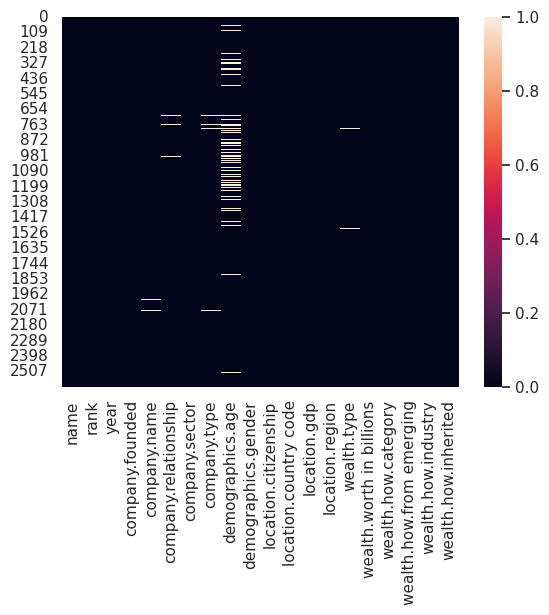

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
null_percentage = (data.isnull().sum()/len(data)*100)
null_percentage

name                         0.000000
rank                         0.000000
year                         0.000000
company.founded              0.000000
company.name                 0.650344
company.relationship         1.262433
company.sector               0.382555
company.type                 1.185922
demographics.age            14.651875
demographics.gender          0.000000
location.citizenship         0.000000
location.country code        0.000000
location.gdp                 0.000000
location.region              0.000000
wealth.type                  0.803366
wealth.worth in billions     0.000000
wealth.how.category          0.038256
wealth.how.from emerging     0.000000
wealth.how.industry          0.038256
wealth.how.inherited         0.000000
dtype: float64

# finding the mean age for both genders
 

In [ ]:
data['demographics.age'].mean()

62.49843119677275

In [ ]:
data.groupby(['demographics.gender'])[['demographics.age']].mean()


,demographics.age
demographics.gender,
family,NaN
female,61.957346
male,62.554950
married couple,NaN


# filling the missing data based on the mean data of each gender

In [ ]:
data['demographics.age'] = data['demographics.age'].fillna(data.groupby('demographics.gender')['demographics.age'].transform('mean'))
data['demographics.age'] = data['demographics.age'].apply(lambda x: round(x) if not np.isnan(x) else x)


In [ ]:

print(data.iloc[239])



name                              Nina Wang
rank                                     80
year                                   1996
company.founded                        1960
company.name                Chinachem Group
company.relationship               relation
company.sector                    chemicals
company.type                            new
demographics.age                       62.0
demographics.gender                  female
location.citizenship              Hong Kong
location.country code                   HKG
location.gdp                 160000000000.0
location.region                   East Asia
wealth.type                       inherited
wealth.worth in billions                3.3
wealth.how.category               Financial
wealth.how.from emerging               True
wealth.how.industry             Real Estate
wealth.how.inherited           spouse/widow
Name: 239, dtype: object


# filling null values for wealth. how. industry

#Fillling the '0' in industry with with nan data

In [ ]:
data['wealth.how.industry'].replace('0',np.nan, inplace=True)

In [ ]:
data.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                17
company.relationship        33
company.sector              10
company.type                31
demographics.age            28
demographics.gender          0
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 21
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry         17
wealth.how.inherited         0
dtype: int64

In [ ]:
null_percentage = (data.isnull().sum()/len(data)*100)
null_percentage

name                        0.000000
rank                        0.000000
year                        0.000000
company.founded             0.000000
company.name                0.650344
company.relationship        1.262433
company.sector              0.382555
company.type                1.185922
demographics.age            1.071155
demographics.gender         0.000000
location.citizenship        0.000000
location.country code       0.000000
location.gdp                0.000000
location.region             0.000000
wealth.type                 0.803366
wealth.worth in billions    0.000000
wealth.how.category         0.038256
wealth.how.from emerging    0.000000
wealth.how.industry         0.650344
wealth.how.inherited        0.000000
dtype: float64

In [ ]:
data_null_industry=data[data['wealth.how.industry'].isnull()]
data_null_industry

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited
384,Porsche family,128,1996,1931,Porsche,NaN,cars,new,NaN,family,Germany,DEU,2.500000e+12,Europe,inherited,2.5,0,True,NaN,father
548,Eugenio Garza Lagnera,182,2001,1890,Femsa,relation,beverages,new,63.0,male,Mexico,MEX,7.250000e+11,Latin America,inherited,2.5,0,True,NaN,3rd generation
632,H Wayne Huizenga,209,2001,1968,Waste Management,founder,waste management,new,63.0,male,United States,USA,1.060000e+13,North America,self-made finance,2.2,Financial,True,NaN,not inherited
714,Robert Naify,234,2001,1912,"UAC Inc, Todd-AO",relation,movie theatres,new,79.0,male,United States,USA,1.060000e+13,North America,inherited,2.0,0,True,NaN,father
798,Yeoh Tiong Lay,264,1996,1955,YTL Corporation,founder,"construction, utilities",new,63.0,male,Malaysia,MYS,1.010000e+11,East Asia,founder non-finance,1.5,0,True,NaN,not inherited
872,H Wayne Huizenga,291,1996,1968,Waste Management,founder,waste management,new,58.0,male,United States,USA,8.100000e+12,North America,self-made finance,1.4,Financial,True,NaN,not inherited
955,Robert Johnson,312,2001,1980,Black Entertainment Television,founder,media,new,54.0,male,United States,USA,1.060000e+13,North America,founder non-finance,1.6,0,True,NaN,not inherited
985,Reimann family,327,1996,1923,Benckiser,NaN,consumer goods,aquired,NaN,family,Germany,DEU,2.500000e+12,Europe,inherited,1.2,0,True,NaN,not inherited
1085,Eugenio Garza Lagnera,361,1996,1890,Femsa,relation,beverages,new,63.0,male,Mexico,MEX,3.970000e+11,Latin America,inherited,1.1,0,True,NaN,3rd generation
1148,Carl Lindner Jr,379,1996,1959,American Financial Group,founder,banking,new,76.0,male,United States,USA,8.100000e+12,North America,founder non-finance,1.1,0,True,NaN,not inherited


# filling null values for company.relationship


In [ ]:
data['company.relationship'].value_counts()

founder                     1225
relation                     946
owner                         94
chairman                      76
investor                      36
                            ... 
vice chairman                  1
shareholder                    1
relation and ceo               1
founder, chairwoman, ceo       1
director                       1
Name: company.relationship, Length: 74, dtype: int64

In [ ]:
data['company.relationship'] = data['company.relationship'].fillna(data['company.relationship'].mode()[0])

# Fill missing data for company Type

In [ ]:
data['company.type'].value_counts()

new                       2269
aquired                    196
privatization               42
 new                        34
subsidiary                   9
state owned enterprise       7
acquired                     5
new                          4
new/aquired                  3
merger                       3
 acquired                    2
franchise                    2
new, privitization           2
neew                         1
franchise rights             1
new division                 1
privatized                   1
joint venture                1
Name: company.type, dtype: int64

In [ ]:
data['company.type'] = data['company.type'].fillna(data['company.type'].mode()[0])

In [ ]:
data.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                17
company.relationship         0
company.sector              10
company.type                 0
demographics.age            28
demographics.gender          0
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 21
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry         17
wealth.how.inherited         0
dtype: int64

# Filling the missing values for the wealth type

In [ ]:
data['wealth.type'].value_counts()

inherited                   953
founder non-finance         713
self-made finance           500
privatized and resources    236
executive                   190
divorce                       1
Name: wealth.type, dtype: int64

In [ ]:
data['wealth.type'] = data['wealth.type'].fillna(data['wealth.type'].mode()[0])

In [ ]:
data.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                17
company.relationship         0
company.sector              10
company.type                 0
demographics.age            28
demographics.gender          0
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                  0
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry         17
wealth.how.inherited         0
dtype: int64

In [ ]:
null_percentage = (data.isnull().sum()/len(data)*100)
null_percentage

name                        0.000000
rank                        0.000000
year                        0.000000
company.founded             0.000000
company.name                0.650344
company.relationship        0.000000
company.sector              0.382555
company.type                0.000000
demographics.age            1.071155
demographics.gender         0.000000
location.citizenship        0.000000
location.country code       0.000000
location.gdp                0.000000
location.region             0.000000
wealth.type                 0.000000
wealth.worth in billions    0.000000
wealth.how.category         0.038256
wealth.how.from emerging    0.000000
wealth.how.industry         0.650344
wealth.how.inherited        0.000000
dtype: float64

# Data description

In [ ]:
data.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2586.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1928.465953,62.552591,1.769103e+12,3.531943
std,467.885695,7.483598,228.752778,12.442850,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.250000,55.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,63.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


# Research Questions Is the factor “age range” responsible for the net worth of a billionaire?
Null hypothesis: There is no significant difference between the mean net worth of a billionaires and the different age ranges.

Alternate hypothesis: There is a significant difference between the net worth of the billionaire and the different age ranges.


In [ ]:

# Create the age ranges
data['age_range'] = pd.cut(data['demographics.age'], bins=[18, 30, 50, 70, 100],
                                      labels=['18-30', '30-50', '50-70', '70+'])

In [ ]:
mean_net_worth1 = data.groupby('age_range')['wealth.worth in billions']
mean_net_worth1.describe()

,count,mean,std,min,25%,50%,75%,max
age_range,,,,,,,,
18-30,13.0,3.992308,7.520689,1.0,1.2,1.4,2.1,28.5
30-50,427.0,3.354567,4.885722,1.0,1.3,1.8,3.3,58.7
50-70,1510.0,3.189934,4.348215,1.0,1.3,2.0,3.2,76.0
70+,633.0,4.502528,6.567950,1.0,1.6,2.5,4.5,72.0


Alternate hypothesis is accepted: There is a significant difference between the net worth of billionaires and the different age ranges.


<Axes: xlabel='age_range', ylabel='wealth.worth in billions'>

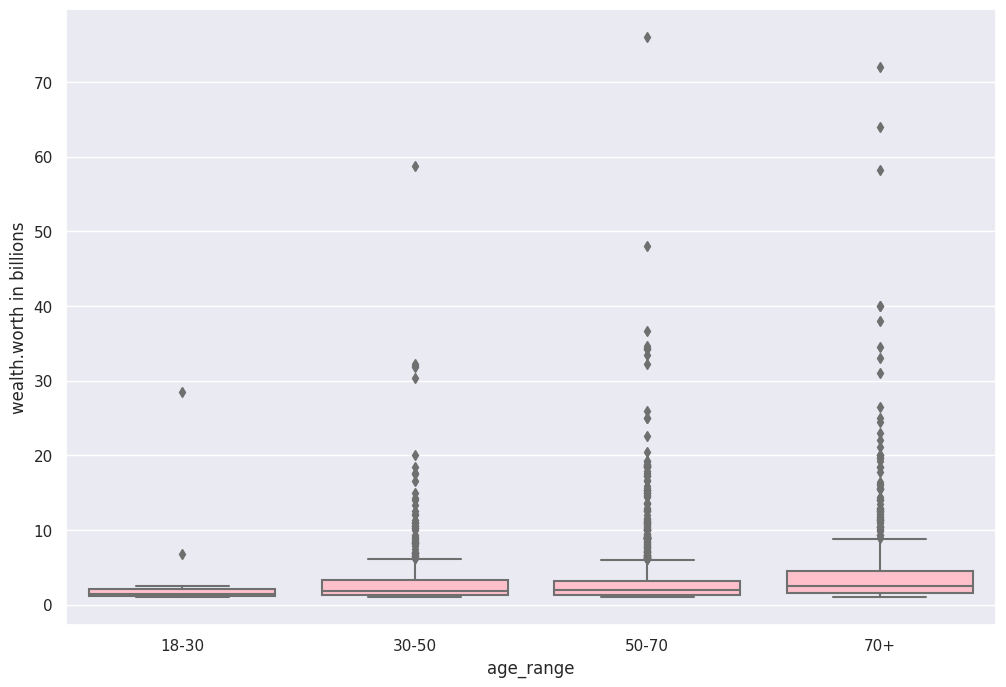

In [ ]:

# Create the age ranges
data['age_range'] = pd.cut(data['demographics.age'], bins=[18, 30, 50, 70, 100],
                                      labels=['18-30', '30-50', '50-70', '70+'])

# Calculate the mean net worth for each age range
mean_net_worth = data.groupby('age_range')['wealth.worth in billions'].mean()

# Perform the ANOVA test
f_statistic, p_value = f_oneway(data.loc[data['age_range'] == '18-30', 'wealth.worth in billions'],
                                 data.loc[data['age_range'] == '30-50', 'wealth.worth in billions'],
                                 data.loc[data['age_range'] == '50-70', 'wealth.worth in billions'],
                                 data.loc[data['age_range'] == '70+', 'wealth.worth in billions'])

# Print the results of the test
if p_value > 0.05:
    print("Null hypothesis cannot be rejected: There is no significant difference between the mean net worth of billionaires and the different age ranges.")
else:
    print("Alternate hypothesis is accepted: There is a significant difference between the net worth of billionaires and the different age ranges.")

#

# Plot the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='age_range', y='wealth.worth in billions', color="skyblue", boxprops=dict(facecolor="pink"))

In [ ]:
f_statistic, p_value

(10.175641885003511, 1.1628284955547446e-06)

<Axes: >

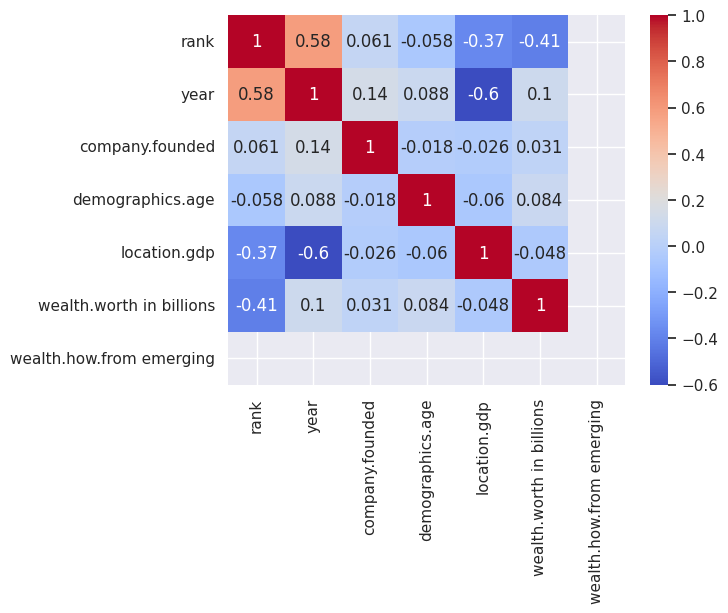

In [ ]:
corr_matrix = data.corr()
# visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# DATA ANALYSIS
  1 What are the top 10 countries with the highest number of billionaires?

In [ ]:
total_billionaire_nationality=data['location.citizenship'].value_counts()
total_billionaire_nationality

United States    903
Germany          160
China            153
Russia           119
Japan             96
                ... 
Bahrain            1
Ecuador            1
Georgia            1
Bermuda            1
Tanzania           1
Name: location.citizenship, Length: 73, dtype: int64

In [ ]:
top10_country_billionaires = data['location.citizenship'].value_counts().head(10)
top10_country_billionaires

United States     903
Germany           160
China             153
Russia            119
Japan              96
Brazil             81
Hong Kong          77
France             72
United Kingdom     65
India              63
Name: location.citizenship, dtype: int64

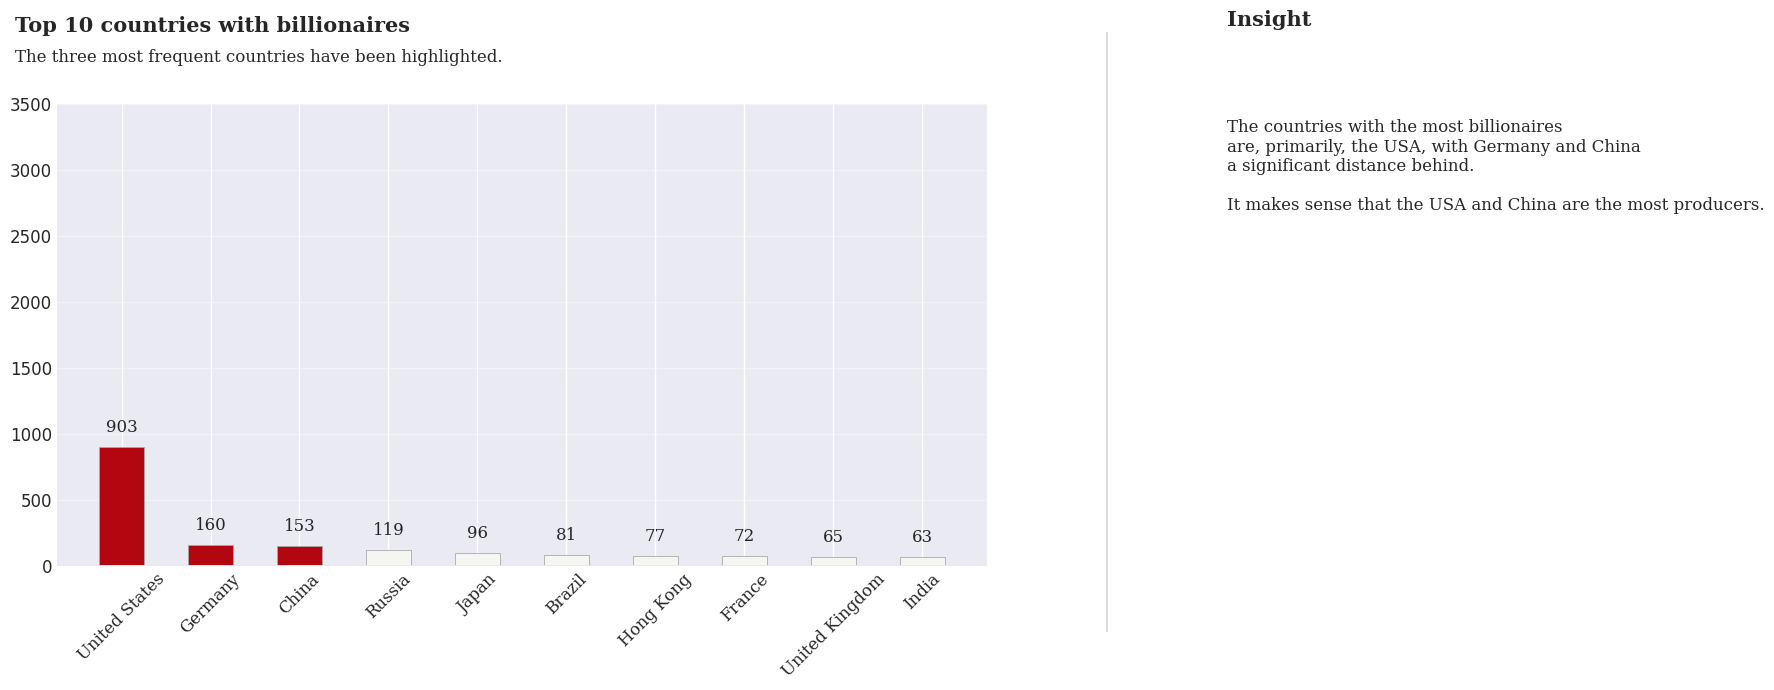

In [ ]:
figure = px.bar(top10_country_billionaires , x=top10_country_billionaires.index , y=top10_country_billionaires.values,title='Top 10 countries with billionaires')
# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(top10_country_billionaires.index, top10_country_billionaires, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in top10_country_billionaires.index:
    ax.annotate(f"{top10_country_billionaires[i]}", 
                   xy=(i, top10_country_billionaires[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(top10_country_billionaires.index, fontfamily='serif', rotation=45)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries with billionaires', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The countries with the most billionaires
are, primarily, the USA, with Germany and China
a significant distance behind.

It makes sense that the USA and China are the most producers.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
pio.templates.default = "plotly_white"
Cumulative_Net_country=data.groupby(['location.citizenship']).sum().sort_values('wealth.worth in billions',ascending = False)
Cumulative_Net_country.reset_index(inplace = True)
pio.templates.default = "ggplot2"
fig = px.bar(data, x = "wealth.worth in billions", y = "location.citizenship",color='location.citizenship', title = "Worth in billions of each country")
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
col = "type"
total_billionaire_nationality.value_counts().reset_index()

## plot
trace = go.Pie(labels=total_billionaire_nationality.index, values=total_billionaire_nationality, pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=1500, legend=dict(x=0.005, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)


In [ ]:
ax= px.treemap(data, path=["location.citizenship"],)
ax.show()

In [ ]:
most_conti=data['location.region'].value_counts()
most_conti
figure = px.bar(most_conti , x=most_conti.index , y=most_conti.values,title='Top continents with billionaire')
figure.show()

# Gender Distribution of billionaires

In [ ]:
billionaire_gender_dist=data['demographics.gender'].value_counts()

<Axes: xlabel='demographics.gender', ylabel='count'>

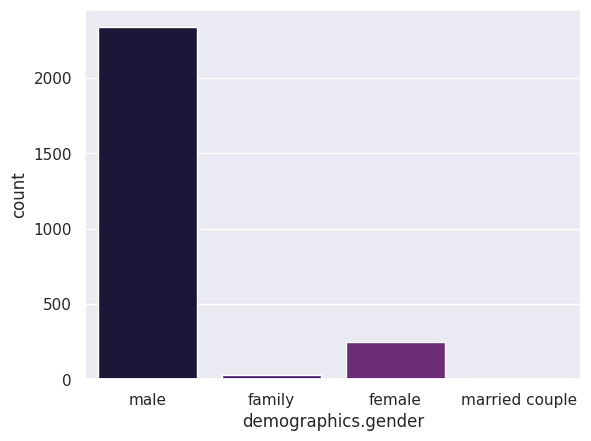

In [ ]:
billionaire_gender_dist=data['demographics.gender'].value_counts()
sns.countplot(x=data['demographics.gender'])

In [ ]:

trace = go.Pie(labels=billionaire_gender_dist.index, values=billionaire_gender_dist, pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=500, legend=dict(x=0.05, y=1.1))

fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

# Age distribution of the billionaires

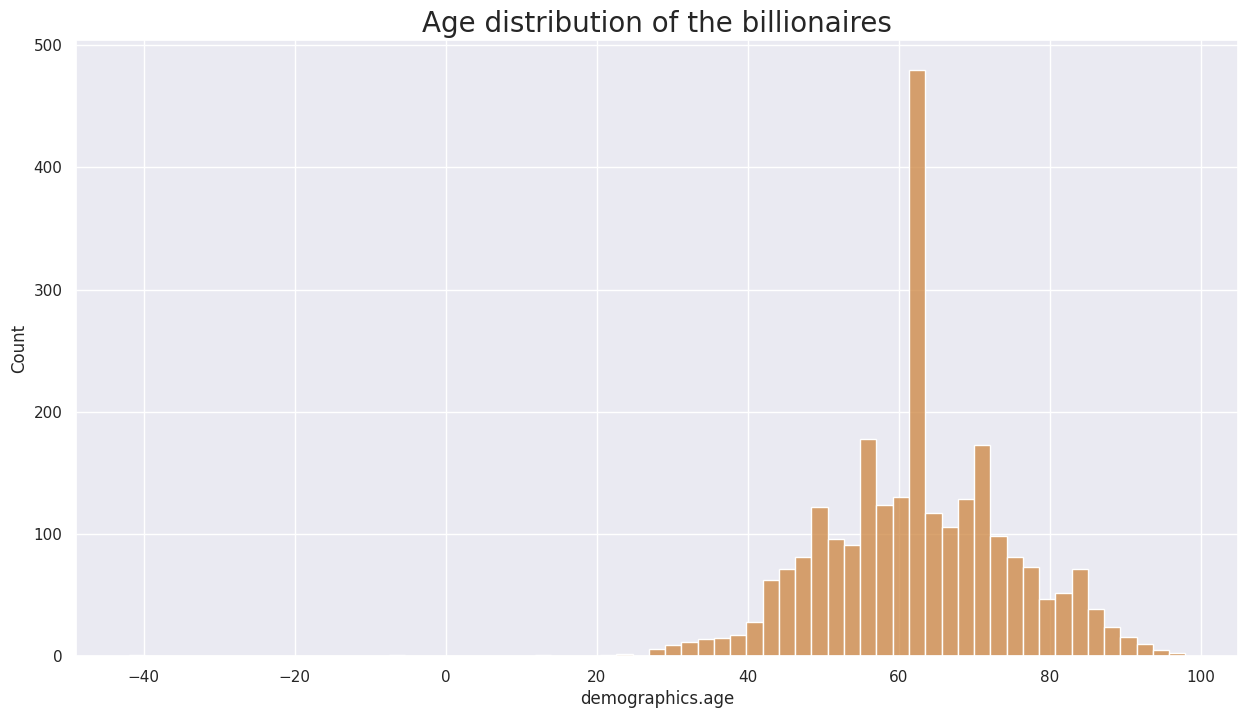

In [ ]:
plt.figure(figsize = (15,8))
sns.histplot(data = data, x = 'demographics.age', color = 'peru')
plt.title('Age distribution of the billionaires',fontsize=20)
plt.show()

# Age range of the billionaires

---



In [ ]:
data['demographics.age.range'] = pd.cut(data['demographics.age'], bins = [18, 30, 50, 70, 100], include_lowest = True, labels = ['18-30', '30-50', '50-70','70+'])
data.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,age_range,demographics.age.range
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40.0,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,30-50,30-50
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45.0,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,30-50,30-50
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58.0,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,50-70,50-70
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65.0,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,50-70,50-70
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70.0,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,50-70,50-70


In [ ]:
data['demographics.age.range'].value_counts()

50-70    1510
70+       633
30-50     427
18-30      13
Name: demographics.age.range, dtype: int64

Total range occured: 2583
[58.5, 24.5, 16.5, 0.5]


,range,occured,Percentage
0,50-70,1510,58.5
1,70+,633,24.5
2,30-50,427,16.5
3,18-30,13,0.5


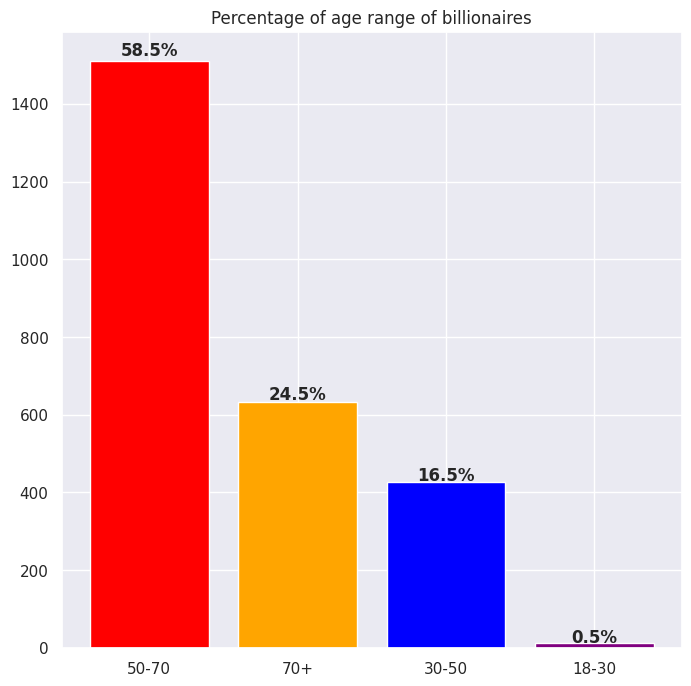

In [ ]:
data_age_range = pd.DataFrame({'range':['50-70','70+','30-50','18-30'],
                     'occured': [1510, 633, 427, 13],})
data_age_range
# get total ocurred of
total_occured = data_age_range.occured.sum()
print('Total range occured: %s' % total_occured)
# compute percentage of each format
percentage = []
 
for i in range(data_age_range.shape[0]):
    pct = (data_age_range.occured[i] / total_occured) * 100
    percentage.append(round(pct, 1))
 # display percentage
print(percentage)
 
# display data
data_age_range['Percentage'] = percentage
display(data_age_range)

# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['Red', 'Orange', 'Blue', 'Purple']
graph = plt.bar(data_age_range.range, data_age_range.occured, color=colors_list)
plt.title('Percentage of age range of billionaires')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(data_age_range.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()

In [ ]:
pio.templates.default = "plotly_white"
Cumulative_Net_age_range=data.groupby(['age_range']).sum().sort_values('wealth.worth in billions',ascending = False)
Cumulative_Net_age_range.reset_index(inplace = True)
pio.templates.default = "plotly_dark"
fig = px.bar(data, x = "wealth.worth in billions", y = "age_range",color='age_range', title = "Worth in billions of age range ")
fig.show()

# What industry/sector is most billionaires

In [ ]:
most_sucessful_industry=data['wealth.how.industry'].value_counts()
most_sucessful_industry



Consumer                           471
Retail, Restaurant                 281
Real Estate                        280
Money Management                   249
Media                              219
Technology-Computer                208
Diversified financial              167
Energy                             132
Technology-Medical                 111
Non-consumer industrial            107
Constrution                         97
Mining and metals                   90
Other                               83
Hedge funds                         67
Private equity/leveraged buyout     25
Venture Capital                      8
banking                              1
services                             1
Name: wealth.how.industry, dtype: int64

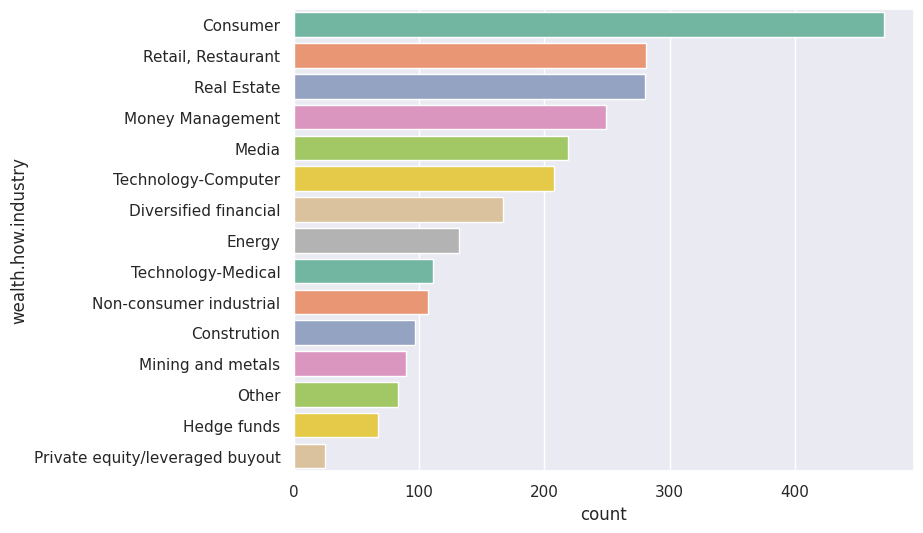

In [ ]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(y="wealth.how.industry", data=data, palette="Set2", order=data['wealth.how.industry'].value_counts().index[0:15],)


In [ ]:
pio.templates.default = "plotly_white"
Cumulative_Net_Industry=data.groupby(['wealth.how.industry']).sum().sort_values('wealth.worth in billions',ascending = False)
Cumulative_Net_Industry.reset_index(inplace = True)
pio.templates.default = "ggplot2"
fig = px.bar(data, x = "wealth.worth in billions", y = "wealth.how.industry",color='wealth.how.industry', title = "Worth in billions of each Industry")
fig.show()

In [ ]:
Cumulative_Net_Industry

,wealth.how.industry,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions,wealth.how.from emerging
0,Consumer,269214,945824,904368,29614.0,8.235606e+14,1756.3,471
1,"Retail, Restaurant",157435,564293,545074,17842.0,5.137051e+14,1161.3,281
2,Technology-Computer,119861,417801,412196,11383.0,5.169140e+14,1015.2,208
3,Media,104585,439361,420947,13638.0,6.889330e+14,852.5,219
4,Real Estate,186239,562540,519247,17944.0,4.262765e+14,844.2,280
5,Money Management,130292,499545,478151,16111.0,4.715969e+14,710.7,249
6,Diversified financial,102919,335763,320351,10920.0,3.445338e+13,702.9,167
7,Energy,81649,265188,258923,7993.0,2.773967e+14,433.3,132
8,Non-consumer industrial,75682,215106,207376,6166.0,8.862100e+13,348.9,107
9,Technology-Medical,79484,223055,217117,6654.0,1.676247e+14,311.0,111


In [ ]:
most_sucessful_sector=data['company.sector'].value_counts()
most_sucessful_sector

real estate                                179
retail                                     120
media                                      118
construction                                97
banking                                     93
                                          ... 
oil/investments                              1
food and energy processess                   1
retail, financial services, real estate      1
networking equipment                         1
food sweeteners                              1
Name: company.sector, Length: 523, dtype: int64

Text(0, 0.5, 'Number of billionaire')

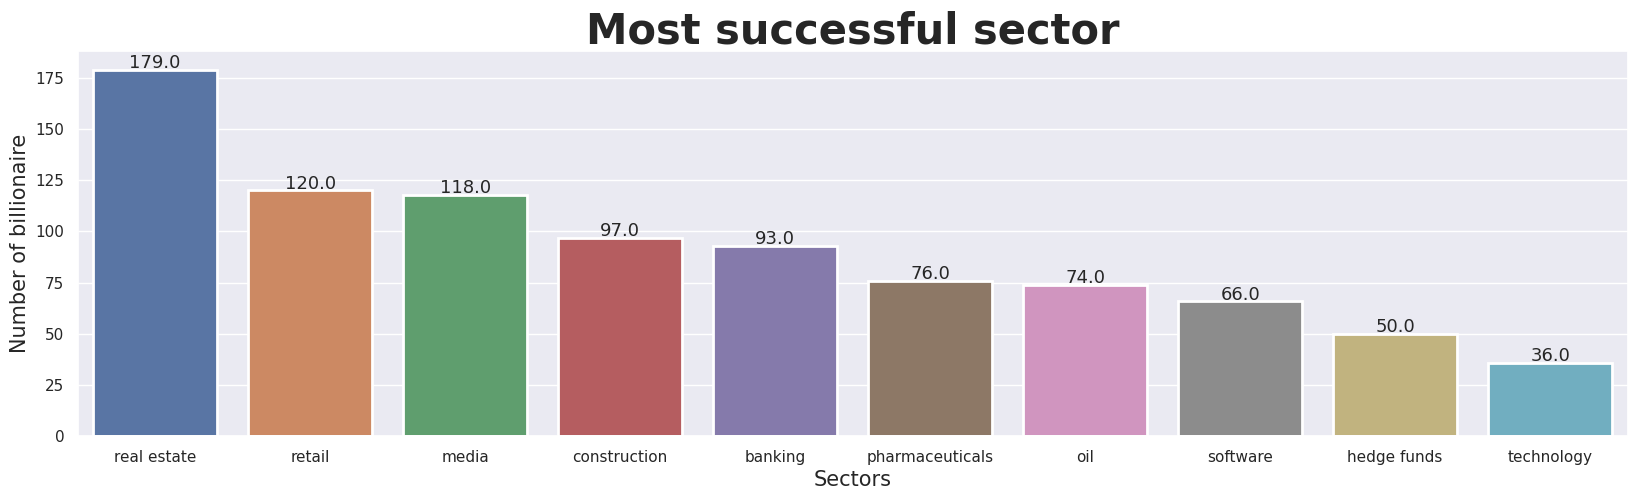

In [ ]:
plt.figure(figsize=(20,5))
most_sucessful_sector = data['company.sector'].value_counts().head(10)
ax = sns.countplot(x="company.sector", 
                   data = data,
                   order = most_sucessful_sector.index,
                   linewidth=2)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 13)
ax.set_title('Most successful sector',fontsize = 30, fontweight='bold' )
ax.set_xlabel('Sectors', fontsize = 15)
ax.set_ylabel('Number of billionaire', fontsize = 15)

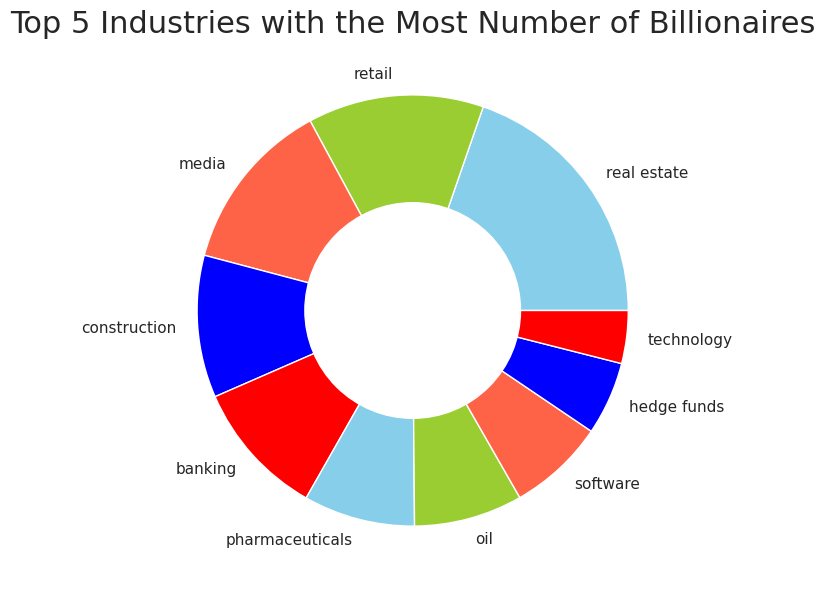

In [ ]:
most_sucessful_sector = data['company.sector'].value_counts().head(10)
index=most_sucessful_sector.index
industries=most_sucessful_sector.values
custom_colors= ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(7,7))
plt.pie(industries,labels=index,colors=custom_colors)
central_circle=plt.Circle((0,0),0.5,color='white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size=14)
plt.title("Top 5 Industries with the Most Number of Billionaires",fontsize=22)
plt.show()

In [ ]:
pio.templates.default = "plotly_white"
Cumulative_Net_sector=data.groupby(['company.sector']).sum().sort_values('wealth.worth in billions',ascending = False)
Cumulative_Net_sector.reset_index(inplace = True)
Top_10_sector_worth =Cumulative_Net_sector.head(10)
Top_10_sector_worth
pio.templates.default = "plotly_white"
fig = px.bar(Top_10_sector_worth, x = "wealth.worth in billions", y = "company.sector",color='company.sector', title = "Worth in billions of each Sector")
fig.show()

# Hypothesis 1

In [ ]:
data['wealth.how.industry'].describe()

count         2597
unique          18
top       Consumer
freq           471
Name: wealth.how.industry, dtype: object

# Gender participation in different Industries

In [ ]:
data.groupby(['demographics.gender'])[['wealth.how.industry']].nunique()

In [ ]:
data_int = data.groupby("wealth.how.industry")["demographics.gender"].value_counts()
data_int

wealth.how.industry              demographics.gender
Constrution                      male                    79
                                 female                  15
                                 married couple           2
                                 family                   1
Consumer                         male                   394
                                 female                  72
                                 family                   5
Diversified financial            male                   153
                                 female                  12
                                 family                   2
Energy                           male                   129
                                 female                   3
Hedge funds                      male                    66
                                 family                   1
Media                            male                   200
                                 female        

In [ ]:
data_gi = data_int.to_frame()
data_gi

In [ ]:
data_gi=data_gi.rename(columns = {"wealth.how.industry":"industry", "demographics.gender":"gender","demographics.gender":"gcount" })
data_gi

In [ ]:

ax=sns.catplot(data = data, kind = 'count', x ='wealth.how.industry', hue ='demographics.gender')
plt.xticks(rotation=90)
ax.fig.set_figwidth(12)
ax.fig.set_figheight(10)

In [ ]:
female_industry_count= female_data_industry.groupby('wealth.how.industry')['demographics.gender'].count()
female_industry_count

In [ ]:

# Filter the dataframe to only include female billionaires
female_data_industry= data[data['demographics.gender'] == 'female']

# Count the number of female billionaires in each industry
industry_counts =female_data_industry['wealth.how.industry'].value_counts()

# Create a color map for the bars
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Plot a histogram of the industry counts with different colors for each bar
plt.bar(industry_counts.index, industry_counts.values, color=colors[:len(industry_counts)])
plt.xticks(rotation=90)
plt.xlabel('wealth.how.industry')
plt.ylabel('Number of Female Billionaires')
plt.show()


# analyse the additional factors that might influence wealth, e.g. inheritance
```



In [ ]:
data['wealth.how.inherited'].describe()

count              2614
unique                6
top       not inherited
freq               1688
Name: wealth.how.inherited, dtype: object

In [ ]:
female_data_industry= data[data['demographics.gender'] == 'female']
female_data_industry

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,age_range,demographics.age.range
26,Christy Walton,9,2014,1962,Walmart,relation,retail,new,59.0,female,...,0.000000e+00,North America,inherited,36.7,Non-Traded Sectors,True,"Retail, Restaurant",spouse/widow,50-70,50-70
28,Alice Walton,10,2001,1962,Walmart,relation,retail,new,52.0,female,...,1.060000e+13,North America,inherited,18.5,Non-Traded Sectors,True,"Retail, Restaurant",father,50-70,50-70
29,Helen Walton,10,2001,1962,Walmart,relation,retail,new,81.0,female,...,1.060000e+13,North America,inherited,18.5,Traded Sectors,True,Consumer,spouse/widow,70+,70+
31,Johanna Quandt,11,1996,1916,BMW,relation,cars,new,68.0,female,...,2.500000e+12,Europe,inherited,8.1,Traded Sectors,True,Consumer,spouse/widow,50-70,50-70
32,Liliane Bettencourt,11,2014,1909,L'Oreal,relation,cosmetics,new,91.0,female,...,0.000000e+00,Europe,inherited,34.5,Traded Sectors,True,Consumer,father,70+,70+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Lam Fong Ngo,1565,2014,1997,Macau Legend,Vice Chairman,casinos,new,62.0,female,...,0.000000e+00,East Asia,self-made finance,1.0,Financial,True,Real Estate,not inherited,50-70,50-70
2578,Liu Xiaomeng,1565,2014,1990,Suning Group,investor,"retail, home appliances",new,59.0,female,...,0.000000e+00,East Asia,executive,1.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,50-70,50-70
2582,Monika Schoeller,1565,2014,1948,Verlagsgruppe Holtzbrinck,relation,publishing,new,75.0,female,...,0.000000e+00,Europe,inherited,1.0,Non-Traded Sectors,True,Media,father,70+,70+
2593,Sara Blakely,1565,2014,2000,Spanx,founder,apparel,new,43.0,female,...,0.000000e+00,North America,founder non-finance,1.0,Traded Sectors,True,Consumer,not inherited,30-50,30-50


In [ ]:
data['wealth.how.inherited'].value_counts()

not inherited               1688
father                       558
3rd generation               210
4th generation                68
spouse/widow                  59
5th generation or longer      31
Name: wealth.how.inherited, dtype: int64

In [ ]:
px.histogram(data_frame=data,x='wealth.how.inherited' ,color='wealth.how.inherited',title='Wealth how inherited')

In [ ]:
inherited= ['3rd generation', 'father','spouse/widow', '5th generation or longer', '4th generation']
not_inherited = ['not inherited']

In [ ]:
inherite = np.select([data['wealth.how.inherited'].isin(inherited)], ['inherited'], 'not inherited')
data['wealth_how_gotten'] =inherite

In [ ]:
data.head(10)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,age_range,demographics.age.range,wealth_how_gotten
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40.0,male,...,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,30-50,30-50,not inherited
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45.0,male,...,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,30-50,30-50,not inherited
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58.0,male,...,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,50-70,50-70,not inherited
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65.0,male,...,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,50-70,50-70,not inherited
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70.0,male,...,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,50-70,50-70,not inherited
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74.0,male,...,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,70+,70+,not inherited
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,founder,pharmaceuticals,new,NaN,family,...,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation,NaN,NaN,inherited
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48.0,male,...,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,30-50,30-50,not inherited
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77.0,male,...,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,70+,70+,not inherited
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68.0,male,...,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,50-70,50-70,not inherited


<Axes: xlabel='wealth_how_gotten', ylabel='count'>

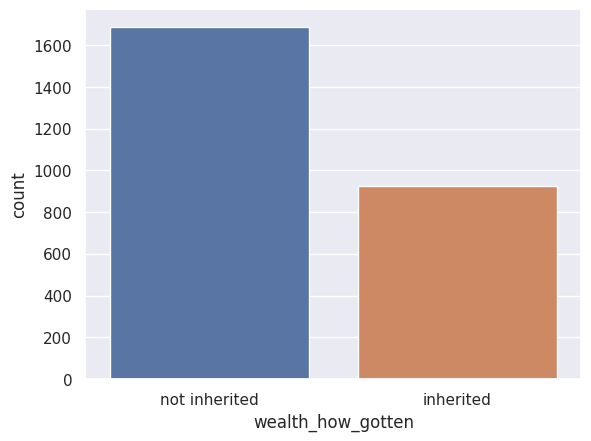

In [ ]:
sns.countplot(x=data['wealth_how_gotten'])

In [ ]:
data['wealth_how_gotten'].value_counts()

not inherited    1688
inherited         926
Name: wealth_how_gotten, dtype: int64

In [ ]:
pio.templates.default = "plotly_white"
Cumulative_Net_inherite=data.groupby(['wealth_how_gotten']).sum().sort_values('wealth.worth in billions',ascending = False)
Cumulative_Net_inherite.reset_index(inplace = True)
pio.templates.default = "plotly_dark"
fig = px.bar(data, x = "wealth.worth in billions", y = "wealth_how_gotten",color='wealth_how_gotten', title = "Worth in billions of inherited fortune")
fig.show()

In [ ]:
Cumulative_Net_inherite


,wealth_how_gotten,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions,wealth.how.from emerging
0,not inherited,1113915,3391541,3262075,104149.0,2.759617e+15,5759.3,1688
1,inherited,453629,1858447,1778935,57612.0,1.864819e+15,3473.2,926


In [ ]:
pio.templates.default = "plotly_white"
Cumulative_Net_inherited=data.groupby(['wealth.how.inherited']).sum().sort_values('wealth.worth in billions',ascending = False)
Cumulative_Net_inherited.reset_index(inplace = True)
pio.templates.default = "plotly_dark"
fig = px.bar(data, x = "wealth.worth in billions", y = "wealth.how.inherited",color='wealth.how.inherited', title = "Worth in billions of inherited fortune")
fig.show()

In [ ]:
data.columns

In [ ]:
data.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                17
company.relationship         0
company.sector              10
company.type                 0
demographics.age            28
demographics.gender          0
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                  0
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry         17
wealth.how.inherited         0
age_range                   31
demographics.age.range      31
wealth_how_gotten            0
dtype: int64

# female billionaire per country

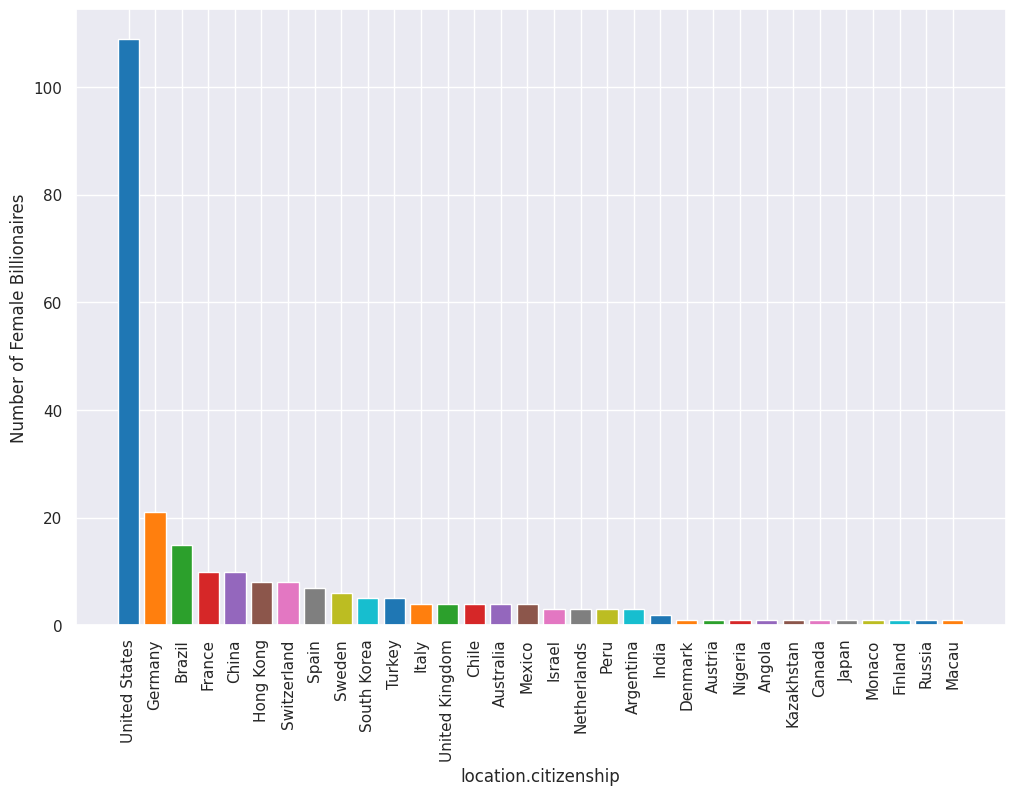

In [ ]:
# Filter the dataframe to only include female billionaires
female_data_country= data[data['demographics.gender'] == 'female']

# Count the number of female billionaires in each country
country_counts =female_data_country['location.citizenship'].value_counts()

# Create a color map for the bars
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plt.figure(figsize=(12, 8))
# Plot a histogram of the industry counts with different colors for each bar
plt.bar(country_counts.index, country_counts.values, color=colors[:len(country_counts)])
plt.xticks(rotation=90)
plt.xlabel('location.citizenship')
plt.ylabel('Number of Female Billionaires')
plt.show()


In [ ]:
country_counts

United States     109
Germany            21
Brazil             15
France             10
China              10
Hong Kong           8
Switzerland         8
Spain               7
Sweden              6
South Korea         5
Turkey              5
Italy               4
United Kingdom      4
Chile               4
Australia           4
Mexico              4
Israel              3
Netherlands         3
Peru                3
Argentina           3
India               2
Denmark             1
Austria             1
Nigeria             1
Angola              1
Kazakhstan          1
Canada              1
Japan               1
Monaco              1
Finland             1
Russia              1
Macau               1
Name: location.citizenship, dtype: int64

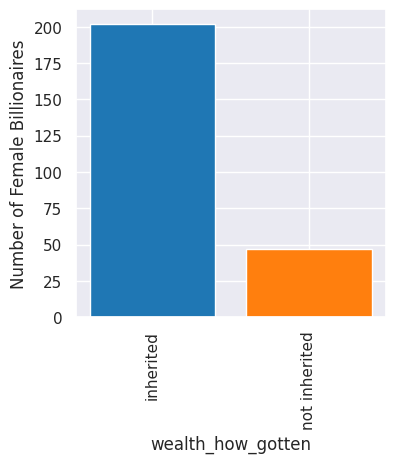

In [ ]:
# Filter the dataframe to only include female billionaires
female_data_country= data[data['demographics.gender'] == 'female']
# Count the number of female billionaires in wealth how gotten
inherited_count= female_data_country['wealth_how_gotten'].value_counts()
# Create a color map for the bars
colors = ['tab:blue', 'tab:orange']
plt.figure(figsize=(4, 4))
# Plot a histogram of the industry counts with different colors for each bar
plt.bar(inherited_count.index, inherited_count.values, color=colors[:len(inherited_count)])
plt.xticks(rotation=90)
plt.xlabel('wealth_how_gotten')
plt.ylabel('Number of Female Billionaires')
plt.show()

In [ ]:
inherited_count

inherited        202
not inherited     47
Name: wealth_how_gotten, dtype: int64

# 2. RQ#2	Is the billionaire net worth whose wealth is inherited the same as the mean net worth is not inherited?

H0:	The mean net worth of inherited billionaires is the same as the mean net worth of not inherited billionaires.

HI:	The mean net worth of inherited billionaires is higher than the mean net worth of not inherited billionaires.


In [ ]:
null_hypothesis = "The mean net worth of inherited billionaires is the same as the mean net worth of not inherited billionaires."
alternative_hypothesis = "The mean net worth of inherited billionaires is higher than the mean net worth of not inherited billionaires."
# select the subset of the DataFrame containing only inherited and not
Inherited_billionaires = data[data['wealth_how_gotten'] == 'inherited']['wealth.worth in billions']
not_inherited_billionaires = data[data['wealth_how_gotten'] == 'not inherited']['wealth.worth in billions']

# perform a two-sample t-test to compare the means of the two groups
t_statistic, p_value = ttest_ind(Inherited_billionaires, not_inherited_billionaires)

# print the results
print("Null Hypothesis: ", null_hypothesis)
print("Alternative Hypothesis: ", alternative_hypothesis)
print("Test Statistic: ", t_statistic)
print("p-value: ", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Null Hypothesis:  The mean net worth of inherited billionaires is the same as the mean net worth of not inherited billionaires.
Alternative Hypothesis:  The mean net worth of inherited billionaires is higher than the mean net worth of not inherited billionaires.
Test Statistic:  1.6287902975260702
p-value:  0.10347801071695617
Accept the null hypothesis


In [ ]:
Inherited_billionaires = data[data['wealth_how_gotten'] == 'inherited']['wealth.worth in billions']
Inherited_billionaires.describe()

count    926.000000
mean       3.750756
std        4.538636
min        1.000000
25%        1.500000
50%        2.300000
75%        4.000000
max       40.000000
Name: wealth.worth in billions, dtype: float64

In [ ]:
not_inherited_billionaires = data[data['wealth_how_gotten'] == 'not inherited']['wealth.worth in billions']
not_inherited_billionaires.describe()

count    1688.000000
mean        3.411908
std         5.364229
min         1.000000
25%         1.300000
50%         1.900000
75%         3.200000
max        76.000000
Name: wealth.worth in billions, dtype: float64

In [ ]:
# perform a two-sample t-test to compare the means of the two groups
t_statistic, p_value = ttest_ind(Inherited_billionaires, not_inherited_billionaires)
t_statistic, p_value

<Axes: xlabel='wealth_how_gotten', ylabel='wealth.worth in billions'>

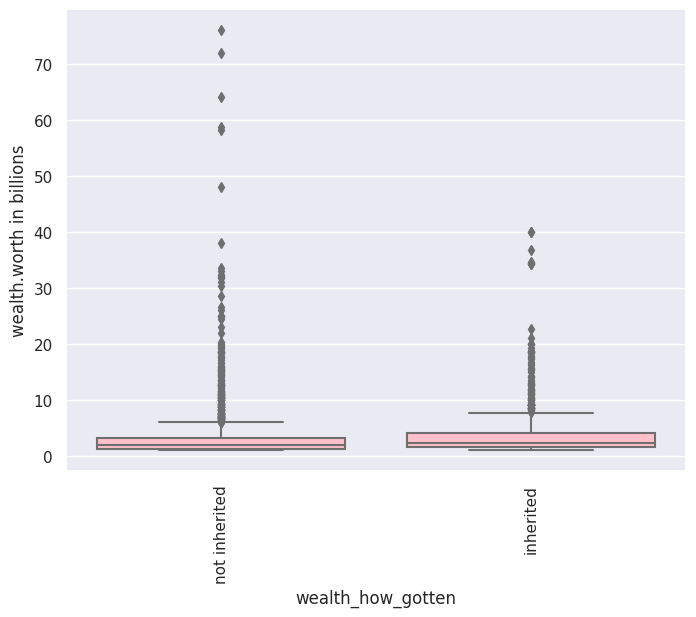

In [ ]:
# Plot the box plot
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='wealth_how_gotten', y='wealth.worth in billions', color="skyblue", boxprops=dict(facecolor="pink"))

<Axes: xlabel='wealth.worth in billions', ylabel='Density'>

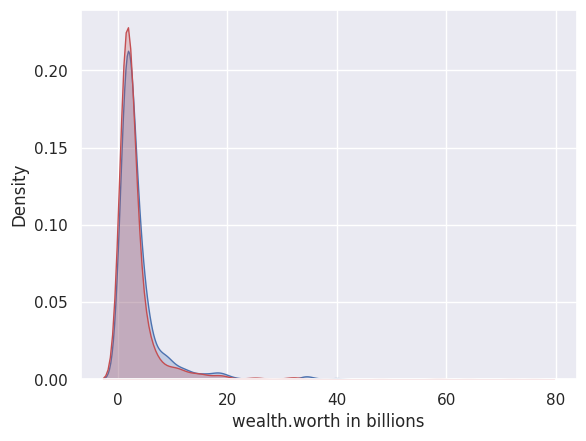

In [ ]:
# Plot a kernel density
sns.kdeplot(Inherited_billionaires, color='b', shade=True,)
sns.kdeplot(not_inherited_billionaires, color='r', shade=True)

In [ ]:
# Filter the DataFrame to include only billionaires in America
data_usa = data[data['location.citizenship'] == 'United States']

age_usa_count= data_usa['age_range'].value_counts()
age_usa_count

50-70    507
70+      265
30-50    125
18-30      6
Name: age_range, dtype: int64

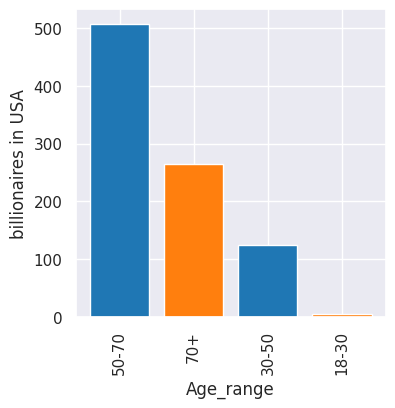

In [ ]:
# Create a color map for the bars
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
plt.figure(figsize=(4, 4))
# Plot a histogram of the industry counts with different colors for each bar
plt.bar(age_usa_count.index, age_usa_count.values, color=colors[:len(inherited_count)])
plt.xticks(rotation=90)
plt.xlabel('Age_range')
plt.ylabel('billionaires in USA')
plt.show()

In [ ]:
# Filter the DataFrame to include only billionaires in America
data_usa = data[data['location.citizenship'] == 'United States']

wealth_usa_count= data_usa['wealth_how_gotten'].value_counts()
wealth_usa_count

not inherited    597
inherited        306
Name: wealth_how_gotten, dtype: int64

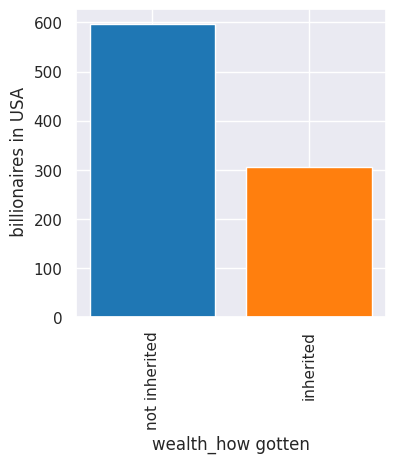

In [ ]:
# Create a color map for the bars
colors = ['tab:blue', 'tab:orange',]
plt.figure(figsize=(4, 4))
# Plot a histogram of the industry counts with different colors for each bar
plt.bar(wealth_usa_count.index, wealth_usa_count.values, color=colors[:len(inherited_count)])
plt.xticks(rotation=90)
plt.xlabel('wealth_how gotten')
plt.ylabel(' billionaires in USA')
plt.show()